# Table of Contents
 <p>

In [1]:
from xgboost import XGBClassifier, XGBRegressor

In [2]:
xgb = XGBClassifier()

In [3]:
import os
os.chdir('../../')

In [4]:
from spikelearn.data import io, SHORTCUTS, select, to_feature_abrray, remove_baseline
from spikelearn.models.shuffle_decoding import shuffle_val_predict

In [5]:
data = io.load('DRRD 8', 'narrow_smoothed')
data = to_feature_array(select(data, is_selected=True, is_tired=False, _min_duration=1.5))

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [91]:
clf=GaussianNB()

In [98]:
res.proba

,cv,tested_on,trained_here,trained_on,400.0,500.0,600.0,700.0,800.0,900.0,1000.0,true_label,group
0,0,0,True,0,3.110926e-01,0.243496,0.214958,0.085418,0.049579,0.066448,0.029009,400.0,13.0
1,0,0,True,0,3.217087e-01,0.264995,0.214609,0.083970,0.038544,0.052820,0.023354,500.0,13.0
2,0,0,True,0,2.613944e-01,0.249753,0.252920,0.114091,0.045274,0.050640,0.025927,600.0,13.0
3,0,0,True,0,2.346714e-01,0.227695,0.194163,0.116691,0.071834,0.090820,0.064125,700.0,13.0
4,0,0,True,0,3.084241e-01,0.226959,0.188701,0.101902,0.065990,0.064577,0.043446,800.0,13.0
5,0,0,True,0,1.663701e-01,0.139577,0.162756,0.170525,0.149881,0.122697,0.088194,900.0,13.0
6,0,0,True,0,1.971763e-01,0.183725,0.209662,0.144347,0.091800,0.114650,0.058640,1000.0,13.0
7,0,0,True,0,4.047310e-01,0.457194,0.059377,0.069003,0.007443,0.000980,0.001272,400.0,14.0
8,0,0,True,0,3.309256e-01,0.436980,0.100495,0.108414,0.017939,0.003176,0.002071,500.0,14.0
9,0,0,True,0,2.964420e-01,0.419374,0.107136,0.153277,0.019674,0.002346,0.001751,600.0,14.0


In [92]:
res = shuffle_val_predict(clf, data.drop([200,300,1100], level='time'), get_weights=False, n_splits=30)

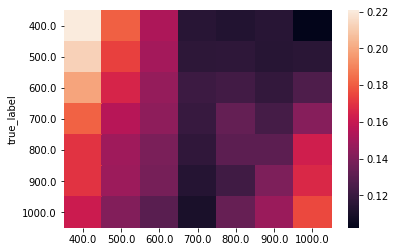

In [93]:
sns.heatmap(res.proba.groupby('true_label').mean().drop('group',axis=1))

In [47]:
xgb.fit(data, data.reset_index().time)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [23]:
from xgboost.plotting import plot_importance

In [3]:
%matplotlib inline

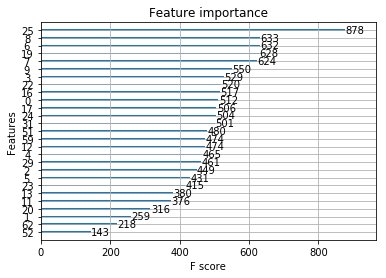

In [48]:
plot_importance(xgb)

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
data = io.load('DRRD 8', 'medium_smoothed')
data = to_feature_array(select(data, is_selected=True, is_tired=False, _min_duration=1.5))

In [40]:
m=remove_baseline(data*100, io.load('DRRD 7', 'baseline'), .5).reset_index().melt(id_vars=['trial','time'])

In [73]:
data=remove_baseline(data*10, io.load('DRRD 7', 'baseline'), .5)

/home/tevo/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


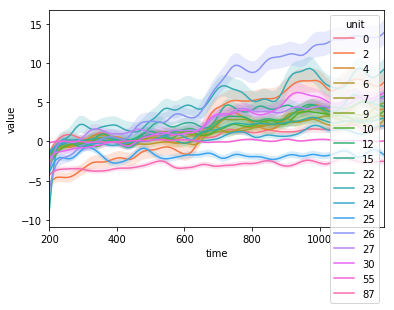

In [41]:
sns.tsplot(time='time', unit='trial', value='value', data=m, condition='unit')

In [21]:
k=data[20].reset_index()[data[20].reset_index().trial < 39]
k['unit']=20

/home/tevo/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


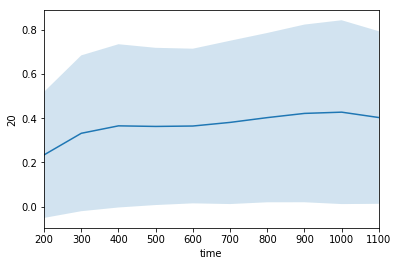

In [23]:
sns.tsplot(time='time', unit='trial', value=20, data=data[20].reset_index(), ci='sd')

/home/tevo/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


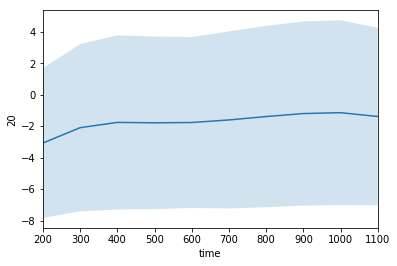

In [25]:
sns.tsplot(time='time', unit='trial', value=20, data=remove_baseline(data*10, io.load('DRRD 8', 'baseline'), .5)[20].reset_index(), ci='sd')

In [200]:
bl = (io.load('DRRD 8', 'baseline').applymap(len)/.5).stack('unit')
bl.name='baseline'

In [135]:
import pandas as pd

In [202]:
fr=data.reset_index('time').groupby('trial').mean().drop('time',axis=1).stack('unit')
fr.name='fr'
fr = pd.DataFrame(fr)
bl = pd.DataFrame(bl)

In [212]:
b0= bl.reset_index().groupby('unit').get_group(0)
f0= fr.reset_index().groupby('unit').get_group(0)

In [215]:
f0['bl'] = f0.trial.map(b0.set_index('trial').baseline)

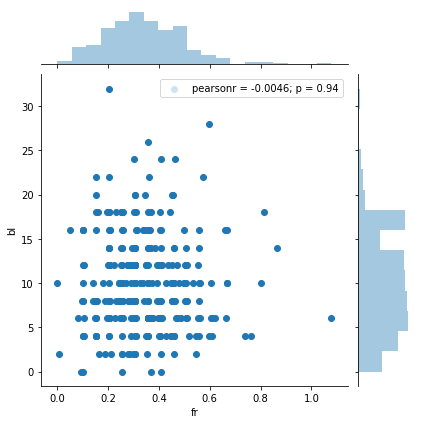

In [217]:
sns.jointplot('fr', 'bl', f0)

#####  Without baseline

In [55]:
n = remove_baseline(data, io.load('DRRD 8', 'baseline'), .5).reset_index().melt(id_vars=['trial','time'])

/home/registroeletrofisio/miniconda3/envs/ratLearn/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


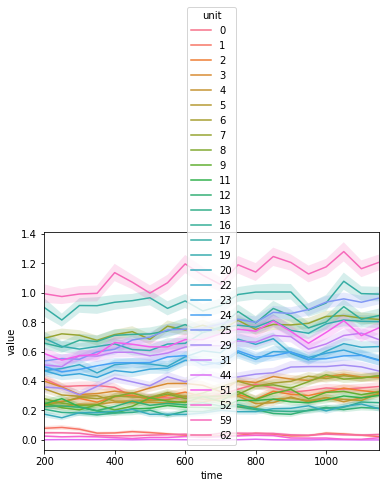

In [89]:
sns.tsplot(time='time', unit='trial', value='value', data=m, condition='unit')z

In [ ]:
sns.jointplot()

---

In [12]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [14]:
res={}

In [62]:
data = io.load(label, 'medium_smoothed_norm')
data = select(data, is_selected=True, is_tired=True, _min_duration=1.5)
sel = to_feature_array(data, subset='full')

In [166]:
from itertools import product

In [124]:
from sklearn.metrics import confusion_matrix
import pandas as pd

In [329]:
resall= pd.DataFrame()

In [373]:
res={'full':{}, 'cropped':{}}
for label, subset in product(SHORTCUTS['groups']['DRRD'],['full', 'cropped']):
    data = io.load(label, 'medium_smoothed')
    data = select(data, is_selected=True, is_tired=False, _min_duration=1.5)
    data = to_feature_array(data, subset=subset)
    res[subset][label] = shuffle_val_predict(clf, [data.iloc[:500], data.iloc[-500:]], ['init', 'end'], n_splits=30, get_weights=False)
    aux =res[subset][label].score.reset_index().groupby('trained_here').get_group(True).pivot('cv', 'tested_on', 'score_max')[['init', 'end']].melt()
    aux['label'] = label
    aux['subset']=subset
    resall = resall.append(aux)

/home/registroeletrofisio/miniconda3/envs/ratLearn/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)
/home/registroeletrofisio/miniconda3/envs/ratLearn/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)
/home/registroeletrofisio/miniconda3/envs/ratLearn/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the f

In [374]:
crop = resall.groupby('subset').get_group('cropped')
full = resall.groupby('subset').get_group('full')

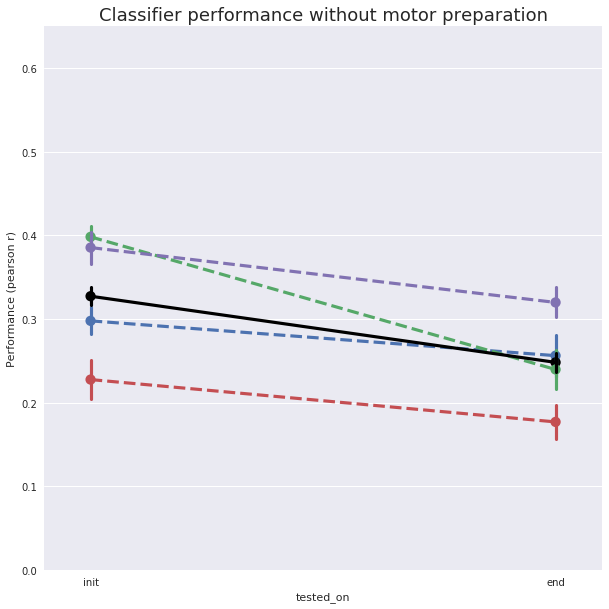

In [375]:
plt.figure(figsize=(10,10))
sns.pointplot(x='tested_on', y='value',hue='label',data=crop,hue_order=['DRRD 10','DRRD 9','DRRD 7','DRRD 8'], linestyles='--',dodge=False,legend=False)
sns.pointplot(x='tested_on', y='value',data=crop,color='k',dodge=True, n_boot=5000)
plt.gca().legend_.remove()
plt.ylim(0,.65)
plt.xlim(-.1,1.1)
plt.title('Classifier performance without motor preparation', fontsize=18)
plt.ylabel('Performance (pearson r)')
plt.savefig('sem_motor_50.png',dpi=200)

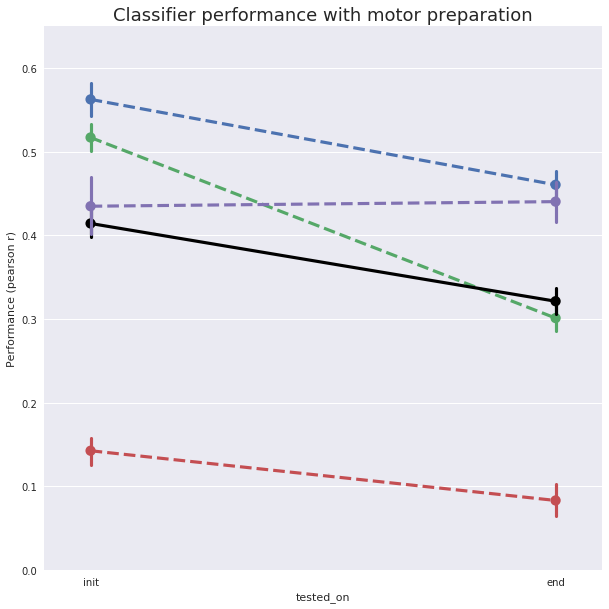

In [376]:
plt.figure(figsize=(10,10))
sns.pointplot(x='tested_on', y='value',hue='label',data=full,hue_order=['DRRD 10','DRRD 9','DRRD 7','DRRD 8'], linestyles='--',dodge=False,legend=False)
sns.pointplot(x='tested_on', y='value',data=full,color='k',dodge=True, linewidth=3)
plt.gca().legend_.remove()
plt.ylim(0,.65)
plt.xlim(-.1,1.1)
plt.title('Classifier performance with motor preparation', fontsize=18)
plt.ylabel('Performance (pearson r)')
plt.savefig('com_motor_50.png',dpi=200)

---

No handles with labels found to put in legend.


(-0.1, 1.1)

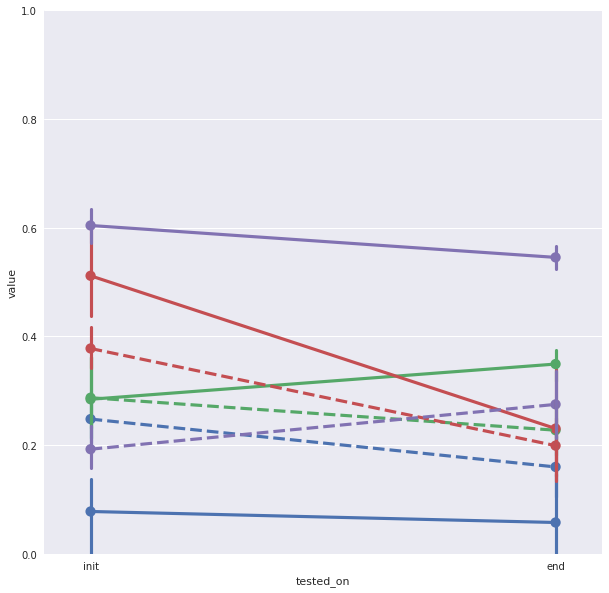

In [236]:
ls={'full':'-', 'cropped':'--'}
mk={'full':'.', 'cropped': '*'}
pal=sns.color_palette('deep',4)
c={'DRRD 7':pal[0], 'DRRD 8':pal[1],'DRRD 9':pal[2],'DRRD 10':pal[3]}

plt.figure(figsize=(10,10))
for label, subset in product(SHORTCUTS['groups']['DRRD'],['full', 'cropped']):
    if label != 'DRRD ':
        d=res[subset][label].score.reset_index().groupby('trained_here').get_group(True).pivot('cv', 'tested_on', 'score_max')[['init', 'end']]
        sns.pointplot(x='tested_on', y='value',data=d.melt(),marker=mk[subset], linestyles=ls[subset], markersize=20, label=label, color=c[label],linewidth=3)        
plt.legend()
plt.ylim(0,1)
plt.xlim(-.1,1.1)


In [173]:
res['full']['DRRD 7']

score_max  score_mean
cv trained_on tested_on trained_here                       
0  end        end       True          -0.034277    0.059663
              init      False         -0.041632    0.006062
   init       end       False         -0.048637   -0.043846
              init      True           0.134625    0.138566
1  end        end       True          -0.033308    0.040188
              init      False         -0.046970   -0.019283
   init       end       False          0.077432   -0.003484
              init      True           0.106045    0.121617
2  end        end       True          -0.023130   -0.046387
              init      False          0.093146    0.158267
   init       end       False          0.042345   -0.004012
              init      True           0.282831    0.300262
3  end        end       True           0.056615    0.138452
              init      False         -0.036925   -0.139472
   init       end       False         -0.014758    0.097333
              init      True           0.225479    0.282541
4  end        end       True           0.084892    0.107498
              init      False         -0.095371   -0.071925
   init       end       False         -0.076812   -0.044831
              init      True           0.019221    0.018507

In [178]:
data = io.load('DRRD 7', 'medium_smoothed_norm')
data = select(data, is_selected=True, is_tired=False, _min_duration=1.5)
data = to_feature_array(data, subset='full')
res = shuffle_val_predict(clf, [data.iloc[1000:2000], data.iloc[-2000:-1000]], ['init', 'end'])

/home/registroeletrofisio/miniconda3/envs/ratLearn/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


In [175]:
data = io.load(label, 'medium_smoothed_norm')
data = select(data, is_selected=True, is_tired=False, _min_duration=1.5)
data = to_feature_array(data, subset=subset)
res = shuffle_val_predict(clf, data)

/home/registroeletrofisio/miniconda3/envs/ratLearn/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


In [179]:
res.score

score_max  score_mean
cv trained_on tested_on trained_here                       
0  end        end       True           0.106812    0.208104
              init      False         -0.060609    0.074424
   init       end       False         -0.024828    0.031259
              init      True          -0.005669   -0.029198
1  end        end       True           0.172036    0.181855
              init      False         -0.002838    0.040600
   init       end       False          0.008702    0.078124
              init      True           0.037773   -0.022244
2  end        end       True           0.168425    0.240610
              init      False          0.117055    0.174319
   init       end       False          0.157603    0.168795
              init      True           0.051118    0.057836
3  end        end       True           0.156643    0.173401
              init      False          0.145921    0.253246
   init       end       False         -0.056556   -0.000991
              init      True           0.053743    0.134172
4  end        end       True          -0.033847    0.028703
              init      False          0.077182    0.218389
   init       end       False          0.099455    0.167795
              init      True          -0.051970   -0.007610

In [176]:
res.score

,,,,score_max,score_mean
cv,trained_on,tested_on,trained_here,,
0,0,0,True,0.310114,0.341715
1,0,0,True,0.321266,0.379863
2,0,0,True,0.305412,0.353940
3,0,0,True,0.307981,0.358915
4,0,0,True,0.320701,0.370876


In [ ]:
pd.DataFrame.pivot()

In [133]:
pd.concat((res['DRRD 10'].score, res['DRRD 8'].score))

score_max  score_mean
cv trained_on tested_on trained_here                       
0  end        end       True           0.332880    0.420182
              init      False          0.308717    0.305684
   init       end       False          0.195590    0.138147
              init      True           0.371305    0.441642
1  end        end       True           0.319840    0.380919
              init      False          0.249070    0.287922
   init       end       False          0.126207    0.102416
              init      True           0.357846    0.429282
2  end        end       True           0.371980    0.434696
              init      False          0.363586    0.433634
   init       end       False          0.259396    0.246367
              init      True           0.391194    0.354650
3  end        end       True           0.511087    0.504218
              init      False          0.321426    0.288525
   init       end       False          0.128903    0.096899
              init      True           0.377472    0.359202
4  end        end       True           0.452129    0.500426
              init      False          0.368784    0.396935
   init       end       False          0.272317    0.262146
              init      True           0.241713    0.330401
0  end        end       True           0.326642    0.456991
              init      False          0.391351    0.514190
   init       end       False          0.445561    0.516359
              init      True           0.518568    0.645803
1  end        end       True           0.396102    0.489345
              init      False          0.424789    0.515093
   init       end       False          0.458959    0.485129
              init      True           0.507909    0.590493
2  end        end       True           0.400172    0.516845
              init      False          0.282470    0.408742
   init       end       False          0.357935    0.405694
              init      True           0.496522    0.577271
3  end        end       True           0.405174    0.488331
              init      False          0.382477    0.493897
   init       end       False          0.426022    0.522007
              init      True           0.525260    0.635575
4  end        end       True           0.474755    0.493988
              init      False          0.339415    0.484080
   init       end       False          0.381770    0.410017
              init      True           0.442636    0.497679

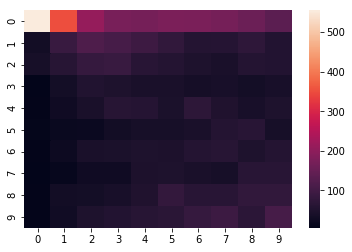

In [121]:
sns.heatmap(confusion_matrix(r.predictions['predictions_max'], r.predictions['true_label']))